linear regression on univariate features

In [38]:
import random
x = random.sample(range(0, 99999999), 1100)
y = []
for i in x:
  y.append(2*i + 12)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
u = x.mean()
std = x.std()
x = (x-u)/std #x and y is normalized means there values lies btw 0 and 1
y = (y-u)/std
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [40]:
print(x.mean())

-1.162706294880164e-16


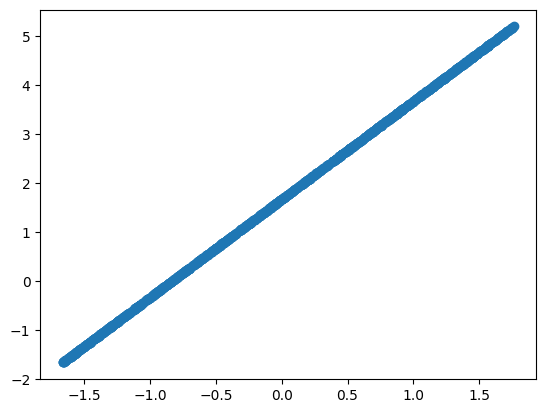

In [48]:
plt.scatter(x, y)

In [49]:
def hypothesis(x, theta):

  y_ = theta[0] + theta[1]*x  #theta 0 is intercept and theta 1 is m
  return y_

In [50]:
def cost(X, Y, theta): #loss or cost
  m = X.shape[0] #m is N in formula i.e., no. of instances
  total_error = 0

  for i in range(m):
    y_p = hypothesis(X[i], theta)

    total_error += (y_p - Y[i])**2 #y_p = y predicted

  return total_error/m

In [73]:
def gradient(X, Y, theta):
  m = X.shape[0]

  grad = np.zeros((2,)) #we have two gradient theta 0 and theta 1

  for i in range(m):
    x = X[i]

    y_p = hypothesis(x, theta)

    y_t = Y[i] #y_t = y target it is ground truth

    grad[0] += (y_p - y_t) #here x is 1
    grad[1] += (y_p - y_t)*x

  return grad/m

In [74]:
from prompt_toolkit.shortcuts.prompt import E
def gradient_descent(X, Y, learning_rate = 0.1):

  theta = np.zeros((2,))
  cost_epoch = [] #gradient descent is an iterative process so when it runs 1 time it is called 1 epoch
  theta_list = []
  max_steps = 200

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost(X, Y, theta)
    cost_epoch.append(e)

    theta[0] = theta[0] - learning_rate*grad[0]

    theta[1] = theta[1] - learning_rate*grad[1]


  return theta, cost_epoch, theta_list

In [75]:
theta, cost_epoch, theta_list = gradient_descent(x, y)

In [76]:
theta

array([1.66913303, 2.        ])

In [77]:
#cost_epoch

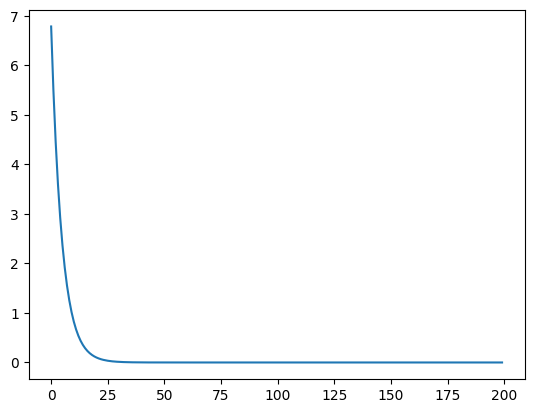

In [78]:
plt.plot(cost_epoch)
plt.show()

In [79]:
y_p = theta[0] + theta[1] * x_test #y_p is y predictions

In [80]:
for i in range(len(y_p)):
  print(y_p[i], y_test[i])

-0.35998688874317497 -0.35998688899714837
4.584089923972706 4.584089927206818
5.0016191691201435 5.001619172648826
-1.5495930995488043 -1.5495931006420542
3.788364941945365 3.788364944618086
2.9392286292664203 2.9392286313400695
-0.9191260080281636 -0.9191260086766136
1.2516847666323756 1.2516847675154492
0.34379083921079734 0.3437908394533446
2.493610977408539 2.493610979167801
4.59249914540695 4.5924991486469935
3.373327694433668 3.3733276968135772
3.4190493676249467 3.4190493700371123
5.0167523336845345 5.016752337223893
1.1652298110633763 1.1652298118854552
4.926041051098675 4.926041054574036
0.42130292706538297 0.42130292736261565
-0.3496295493247572 -0.34962954957142356
0.7498329532655825 0.7498329537945957
-1.117907530383033 -1.1179075311717255
4.92231926320647 4.922319266679205
0.05672684598846556 0.05672684602848677
-1.0657440529186137 -1.065744053670504
5.04439933181806 5.044399335376924
2.8157012597459454 2.815701261732445
-0.3749942309156389 -0.3749942311802002
3.2451892639

In [81]:
def R2_score(y_t, y_p): #R2 tell that ki prdiction true value ke kitne close han
  numerator = np.sum((y_t - y_p)**2)
  denominator = np.sum((y_t - y_t.mean())**2)

  score = (1 - numerator/denominator)

  return score

In [82]:
R2_score(y_test, y_p) #End of Linear Reg here x on x test, y on y test and y_p draw

1.0

In [83]:
# Data Viz

In [84]:
a = np.array([5,4,3,2,1])
b = np.array([30,60,80,90,10,30,50,10])

In [85]:
a,b = np.meshgrid(a, b)

In [86]:
print(a.shape, b.shape)

(8, 5) (8, 5)


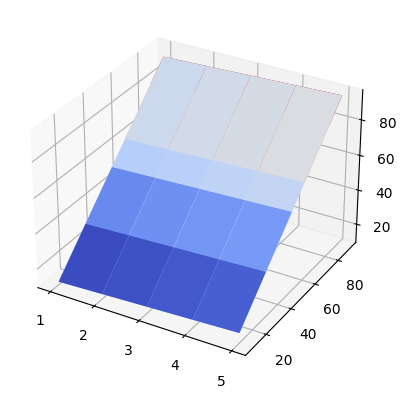

In [87]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a+b, cmap = 'coolwarm')
plt.show()

In [88]:
a = np.arange(-1, 1, 0.02)
b = a
a,b = np.meshgrid(a, b)

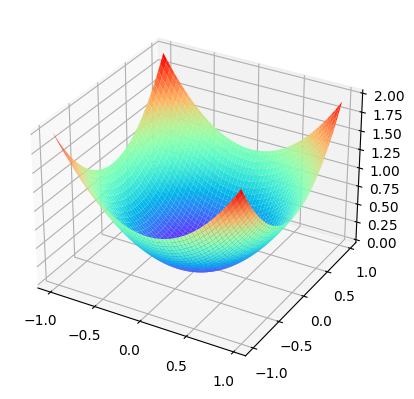

In [89]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

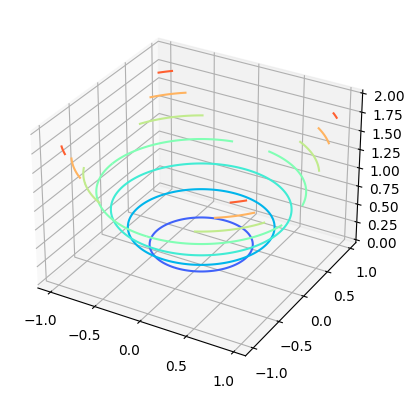

In [90]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

In [93]:
def gradient_descent(X, Y, learning_rate = 0.01):
  theta = np.zeros((2,))
  cost_epoch = []
  theta_list = []

  max_steps = 1000

  for i in range(max_steps):

    grad = gradient(X, Y, theta)


    e = cost(X, Y, theta)
    cost_epoch.append(e)

    theta[0] = theta[0] - learning_rate * grad[0]

    theta[1] = theta[1] - learning_rate * grad[1]

    theta_list.append([theta[0], theta[1]])

  return theta, cost_epoch, theta_list

In [95]:
theta, cost_epoch, theta_list = gradient_descent(x, y)

In [96]:
theta_list = np.array(theta_list)

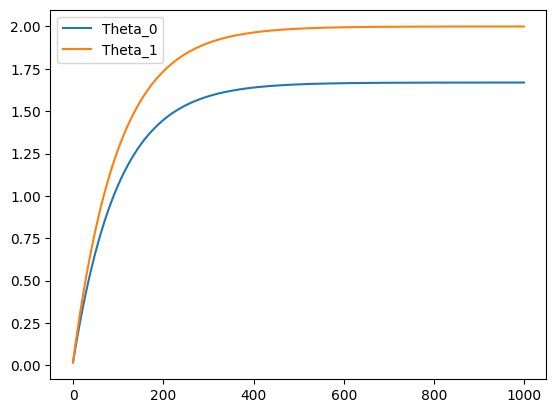

In [97]:
plt.plot(theta_list[:, 0], label = 'Theta_0')
plt.plot(theta_list[:, 1], label = 'Theta_1')
plt.legend()
plt.show()

In [98]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in  range(J.shape[0]):
  for j in range(J.shape[1]):
    y_pred = T0[i, j] + T1[i, j] * x_test
    J[i, j] = (np.sum((y_pred - y_test)**2))/y_test.shape[0]

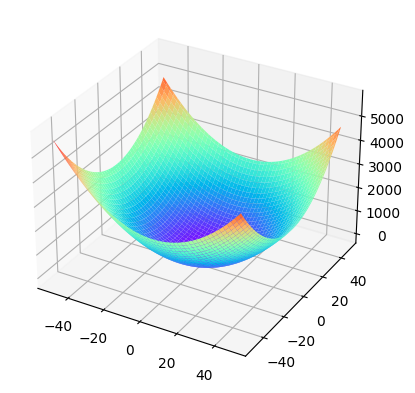

In [99]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1], cost_epoch, color='red')
plt.show()